# DAV 6150 - Module 4 Assignment Sample Student Solution (2)

In this assignment, we are going to be looking at a dataset that contains information about cars. We are interested in using this data to predict the `city-mpg`, the miles per gallon the car provides.

In order to do this, we will be performing eda, looking to see what features we could use from our dataset. We then will prepare our data and build a regression model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Here is a brief description of all the columns. This just elaborates on the descriptions that can be found at https://archive.ics.uci.edu/ml/datasets/Automobile

1. symboling: This describes how safe the car is. Possible values are -3, -2, -1, 0, 1, 2, 3 where -3 is the least safe and 3 the most.
2. normalized-losses: This describes how much money the car loses due to insurance each year. It is continuous from 65 to 256.
3. make: This is the name of the company that made the car. Possible values are
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, and volvo

4. fuel-type: This is the fuel type. Possible values are diesel, and gas.
5. aspiration: This is the way in which air gets intaked into the car. Values are std, and turbo.
6. num-of-doors: This is the number of doors. Values are four and two.
7. body-style: Possible values are hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: Possible values are 4wd, fwd, rwd.
9. engine-location: Possible values are front, rear.
10. wheel-base: This is the distance between the front and rear tires. It is continuous from 86.6 120.9.
11. length: This is the total length of the car. It is continuous from 141.1 to 208.1.
12. width: This is continuous from 60.3 to 72.3.
13. height: This is continuous from 47.8 to 59.8.
14. curb-weight: This is the total mass of the car. continuous from 1488 to 4066.
15. engine-type: Possible values are dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: Cylinders are where the gasoline is burned. Here a car can have eight, five, four, six, three, twelve, or two cylinders.
17. engine-size: The size of the engine. This is continuous from 61 to 326.
18. fuel-system: The system that stores the fuel. The types are 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: This is the diameter of the cylinders above. It is continuous from 2.54 to 3.94.
20. stroke: This is the distance within the cylinder that the piston travels. This is continuous from 2.07 to 4.17.

Important Note :"big bore gives you higher performance at high revs and long stroke gives you lower fuel consumption at everyday usage." https://mechanics.stackexchange.com/questions/24969/what-is-meant-by-bore-and-stroke These 2 features could be important. 

21. compression-ratio: This describes difference between where the cylinder is the largest and the smallest as the piston moves up and down. See here for a visualization. https://jalopnik.com/heres-what-compression-ratio-actually-means-and-why-it-1819723873 It is continuous from 7 to 23.
22. horsepower: This is the rate work is being done. It is continuous from 48 to 288.
23. peak-rpm: This describes the rotations per minute. It is continuous from 4150 to 6600.
24. city-mpg: This is our target variable. It describes the fuel consumption of a car when the car keeps stopping and moving. It is continuous from 13 to 49.
25. highway-mpg: This also describes fuel efficiency just this describes it when the car is not stopping. It is continuous from 16 to 54.
26. price: This is the price of the car. It is continuous from 5118 to 45400. 

In [2]:
columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke','compression-ratio', 'horsepower', 'peak-rpm','city-mpg','highway-mpg', 'price']

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/jtopor/DAV-6150/main/2020/M4_Data.csv', names = columns)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
targetCol = 'city-mpg'
target = df[targetCol]
features = df.drop(targetCol, axis = 1)

In [6]:
features.shape

(205, 25)

Our dataset is very wide. We have very few rows and lots of features. This is a very bad ratio. 

In [7]:
205/25

8.2

Now let's look at the types since we are going to treat numerical values differently than categorical.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

One problem I'm noticing is that some of the continuous columns are being represented as objects. They probably have null values entered wrong as strings. We should clean these up before we do our eda.

In [9]:
import re
def FindMatching(regex, df, column):
    r = re.compile(regex) 
    return df[column][df[column].apply(lambda x: bool(r.match(x)))] # decently slow but useful for me. 

    

In [10]:
r = '[^a-zA-Z0-9]'
FindMatching(r, df, 'bore')

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [11]:
FindMatching(r, df, 'stroke')

55    ?
56    ?
57    ?
58    ?
Name: stroke, dtype: object

Both bore and stroke have nulls at rows 55, 56, 57, and 58. Let's look at these rows.

In [12]:
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None

df.loc[[55,56,57,58]]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,?,?,9.4,135,6000,16,23,15645


These rows are nearly identical.  The last row has a different fuel system and a different horsepower. The price is different for all 3 of them. 

In [13]:
df[df['engine-type'] == 'rotor']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,?,?,9.4,135,6000,16,23,15645


Interestingly, there are no other rows for this engine type. All rotor engines have null bore and stroke. From some research about how rotor engines work, these values simply don't apply for this engine-type.

This is going to be somewhat of a problem for us, not just because these rows are null, but also because we just found that this engine-type column is very sparse.

In [14]:
df['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

When we split up our model into a training and test set, it will be a problem to include almost all of these columns simply because it is possible that that column could be all zeros. The only real work around here would be to convert engine-type into a column for is the engine an ohc or is it not. But if we do this we have to ask does it make sense intuitively to group all of these engines together? It doesn't seem to make 100 percent sense. We could revisit this later after our eda although we may have to drop this feature. 

For now we still have to get rid of the '?'s. Let's explore further if there is a relationship between bore and stroke since they are both null together.

In [15]:
def ConvertColsToType(df, cols, _type):
    for col in cols:
        df[col] = df[col].astype(_type)
    return df

In [16]:
testCorr = df[['engine-type','bore','stroke']]
testCorr = testCorr.drop([55,56,57,58]) #For now let's get rid of these instances ts we can do our analysis.
testCorr = ConvertColsToType(testCorr, ['bore', 'stroke'], float)
testCorr.head()



,engine-type,bore,stroke
0,dohc,3.47,2.68
1,dohc,3.47,2.68
2,ohcv,2.68,3.47
3,ohc,3.19,3.40
4,ohc,3.19,3.40


One I'm noticing here is that when bore is 3.47 the stroke is the same. We will test if all the rows are like this after.

In [17]:
engineTypes = testCorr['engine-type'].unique()
testCorr.groupby(['bore', 'stroke']).count()# We only have 200 records total so we might as well just make a table. 

engine-type
bore stroke             
2.54 2.07              1
2.68 3.47              1
2.91 3.03              1
     3.07              1
     3.41              5
2.92 3.41              1
2.97 3.23             12
2.99 3.47              1
3.01 3.40              5
3.03 3.11              4
     3.15              4
     3.39              4
3.05 3.03              6
3.08 3.15              1
3.13 3.40              2
3.15 3.29              9
     3.58              6
3.17 3.46              3
3.19 3.03              7
     3.40             13
3.24 3.08              2
3.27 3.35              7
3.31 3.19              3
     3.23              1
     3.54              4
3.33 3.47              2
3.34 3.46              1
3.35 3.46              4
3.39 3.39              6
3.43 3.23              1
     3.27              6
     3.64              1
3.46 2.19              2
     3.10              2
     3.19              3
     3.90              2
3.47 2.68              2
3.50 2.80              2
3.54 2.76              1
     3.07              5
3.58 2.87              1
     3.64              4
     3.86              1
3.59 3.86              3
3.60 3.90              1
3.61 3.21              1
3.62 2.36              1
     2.64             11
     3.15              2
     3.39              3
     3.50              6
3.63 4.17              2
3.70 3.52              5
3.74 2.90              3
3.76 3.16              1
3.78 3.12              1
     3.15              7
3.80 3.35              2
3.94 3.11              2

This is kind of a mixed bag. We can see right away that there is not a 1 to 1 relationship between bore and stroke type, although few don't satisfy this relationship. We can see this from how in the table above, most bore numbers only have 1 stroke number. At the same time though, when the values do differ, they could be significant. For example, when bore is 3.62 we see values at both 2.36 which is on the lower end of the range, and at 3.50 which is at the higher end. For this reason we shouldn't vainly throw out one of the variables. This is especially true based on the note I raised when describing the variables about how there is a post on the internet about how long strokes have better fuel efficiency.  
We do have to fill in the rotor values which are null though. Since it is a very small percentage of our dataset and we are going to use multiple features we may want to use the median. For now let's fill them with nan then convert to float.

In [18]:
df = df.replace('?', np.nan) #We should relook at all the nulls after but it's hard if they are stored improperly. 
df = ConvertColsToType(df, ['bore', 'stroke', 'normalized-losses', 'price', 'peak-rpm', 'horsepower'], float)

Number of doors and number of cylinders are also really discrete numeric values.

In [19]:
numMap = {'one':1, 'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8, 'twelve': 12}
df['num-of-doors'] = df['num-of-doors'].replace(numMap)
df['num-of-cylinders'] = df['num-of-cylinders'].replace(numMap)

Now that we have all the right data types, we could start doing our eda.

Let's check for nulls also first though.

In [20]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We have a lot of nulls for normalized-losses and a few for horsepower, power, price, and num-of-doors. We already saw the ones for bore and stroke are being caused by the engine-type not having those fields be applicable. It is strange that price would be null. 

In [21]:
df[df.price.isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,2.0,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,4,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,4.0,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,4,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,2.0,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,8,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


We might attribute this to a data collection problem. Nothing about these rows seems that unique.

More problematic though are the normalized-losses column since there are over 40 nulls in that column.

In [22]:
df[df['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,2.0,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,4.0,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,4.0,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,6,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,4.0,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,6,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,2.0,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,6,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,4.0,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,6,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


Again there is no apparent reason for the nulls. We might be inclined to drop this variable simply because intuitively there is no reason why the amount of insurance people lose every year to their car is related to the mpg a car drives. We can check this.

In [23]:
df.corr()['normalized-losses']

symboling            0.528667
normalized-losses    1.000000
num-of-doors        -0.407134
wheel-base          -0.074362
length               0.023220
width                0.105073
height              -0.432335
curb-weight          0.119893
num-of-cylinders     0.175380
engine-size          0.167365
bore                -0.036167
stroke               0.065627
compression-ratio   -0.132654
horsepower           0.295772
peak-rpm             0.264597
city-mpg            -0.258502
highway-mpg         -0.210768
price                0.203254
Name: normalized-losses, dtype: float64

The correlation is small and it is possible that it is just due to chance.

Let's look at all the distributions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F37EA5358>,
      dtype=object)

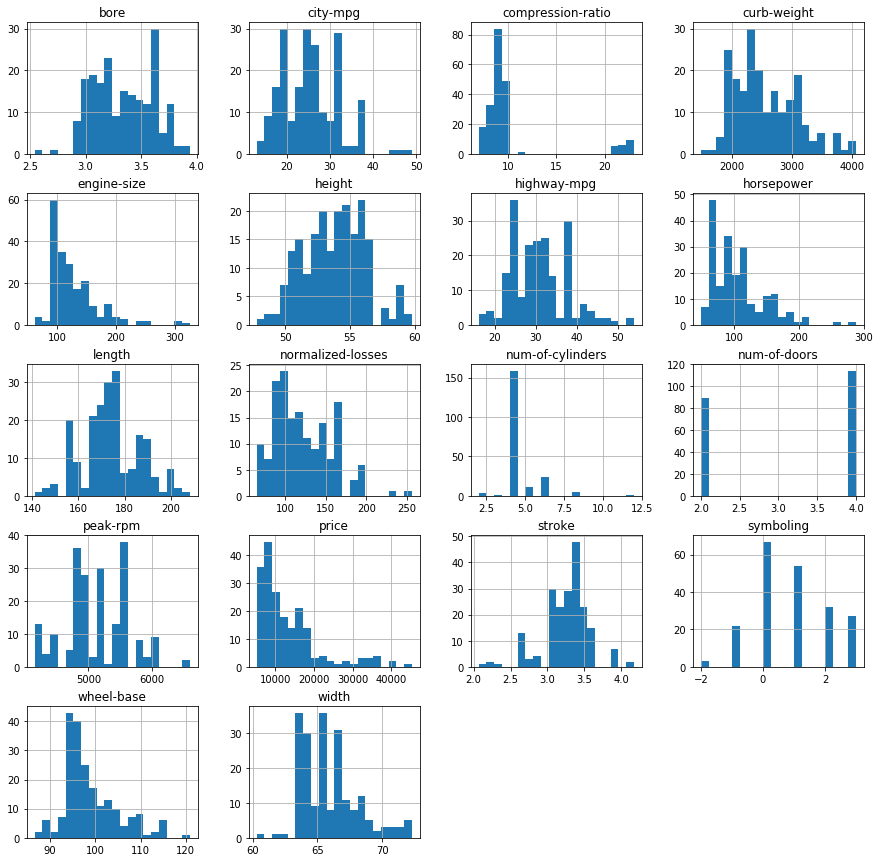

In [24]:
df.hist(figsize=(15,15), bins = 20)

These are histograms of our numeric data. We see that the scales for all of these graphs are different.
Let's look at each one in more depth.

We see that bore has a bimodal type plot with 2 peaks, the left peak being lower.

city-mpg seems to have high values between around 18-40 with a few dips. The dips may be just because we have so few rows. We could expect most values to fall between this 18-40 range. 

Compression ratio peaks a bit under 10 and there are a few outliers. We should look at these outlier rows later. Because we are doing a regression, outlier rows could make a big impact. 

Curb weight, normalized losses, engine-size, wheelbase, price and width are all rightly skewed. We see a few noticeable outliers here too. For example we see some widths around 60, and a normalized loss around 250. 

Height seems to be more leftly skewed. Num of cylinders and num of doors both seem to have high peaks at 4.
There is very little variance to Num of Cylinders and it should probably be dropped.

Stroke seems to be normal but it is missing values in some places, probably also due to the small dataset. 

Symboling seems to be normal. The one thing though is that this isn't really a numerical variable.

Let's use a scatterplot to get an idea of what the correlations between each variable are.

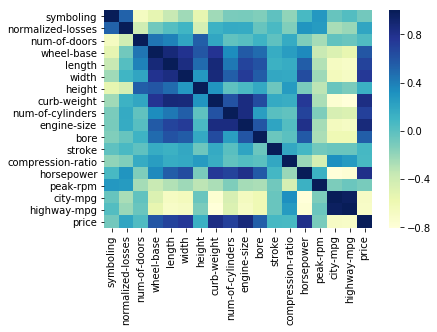

In [25]:
import seaborn as sns
corr = df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")

We see a lot of correlation between the variables. Our target variable, city-mpg has weake relationships with many of the variables and a particularly strong relationship with highway-mpg.
Simply by including highway-mpg we probably would have a very accurate model. We aren't going to do that though since it is a leaky variable. Naturally, if we want to know what the mpg of a car is in a city we wouldn't know what the highway-mpg is. 

Most of the other variables show a moderate degree of correlation with each other. We are going to need to deal with this in some way. 

We really have a few choices here.

1. We use PCA. This would produce features that are not collinear. The problem with this though is that we can't readily interperet the coeficents of our model. 

2. We could go through the features 1 by 1 with backwords selection. The problem with this is that we have so few rows, especially after splitting it into training and testing set, it would be hard to use a p value. We could easily find ourselves including features that should be excluded and excluding features that should be included. The advantage to this method is that we would be able to interperet our coeficcents. 


In [26]:
df.corr()['city-mpg'].abs().sort_values(ascending = False)

city-mpg             1.000000
highway-mpg          0.971337
horsepower           0.803620
curb-weight          0.757414
price                0.686571
length               0.670909
engine-size          0.653658
width                0.642704
bore                 0.594584
wheel-base           0.470414
num-of-cylinders     0.445837
compression-ratio    0.324701
normalized-losses    0.258502
peak-rpm             0.113788
height               0.048640
stroke               0.042906
symboling            0.035823
num-of-doors         0.020812
Name: city-mpg, dtype: float64

This is an easier way to look at it. We see the high correlation between city-mpg and multiple other columns including curb-weight, price, length, etc...

As some preliminary inferences, I would guess that these features would be important when making the model. I would expect horsepower, curb-weight, and price all to be important factors. That being said, knowing that there are correlations between the variables, I would expect that some of the strength of each variable is overlapping with the other variables.

Let's look at some of the categorical variables.

In [27]:
df.make.value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

The make column has many possible values. One problem that we are going to have is some of these values are very sparse. 
Once again it isn't relly logical to group the variables into an other column since some of the other category may have significantly better mpg. Here it might make the most sense just to have boolean columns for the top few of the list and ignore the others. 

In [28]:
df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

These values aren't so sparse and we can use this feature if it helps us.

Let's see if this is related to our target variable.

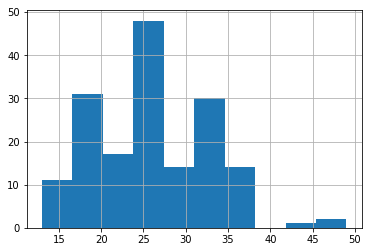

In [29]:
std = df[df.aspiration == 'std']
std['city-mpg'].hist()

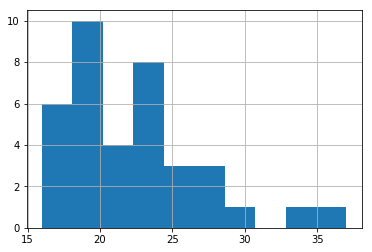

In [30]:
turbo = df[df.aspiration == 'turbo']
turbo['city-mpg'].hist()

It seems like turbo engines have a noticably lower mpg... This could be due to chance though. Also, it might be related to another variable too. 

Let's look at one of the variables with outliers.

In [31]:
df[df.price > 35000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
16,0,NaN,bmw,gas,std,2.0,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,6,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,4.0,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,6,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0
48,0,NaN,jaguar,gas,std,4.0,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,6,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0
49,0,NaN,jaguar,gas,std,2.0,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,12,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
72,3,142.0,mercedes-benz,gas,std,2.0,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,8,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
73,0,NaN,mercedes-benz,gas,std,4.0,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,8,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0
74,1,NaN,mercedes-benz,gas,std,2.0,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,8,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0
128,3,NaN,porsche,gas,std,2.0,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,6,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0


Most of these rows have null normalized losses which is interesting. We could conjecture because they are so expensive they aren't rated the same as the other columns. 

Let's now look at the outliers. As mentioned, these could significantly affect our regression.

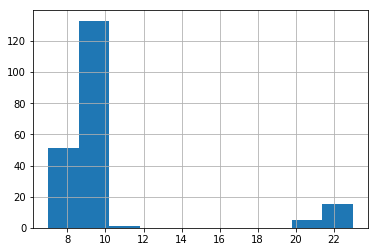

In [32]:
df['compression-ratio'].hist()

In [33]:
df[df['compression-ratio'] >= 19] 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,4,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
66,0,NaN,mazda,diesel,std,4.0,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,4,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
67,-1,93.0,mercedes-benz,diesel,turbo,4.0,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,5,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0
68,-1,93.0,mercedes-benz,diesel,turbo,4.0,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,5,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0
69,0,93.0,mercedes-benz,diesel,turbo,2.0,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,5,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0
70,-1,93.0,mercedes-benz,diesel,turbo,4.0,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,5,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
90,1,128.0,nissan,diesel,std,2.0,sedan,fwd,front,94.5,165.3,63.8,54.5,2017,ohc,4,103,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0
108,0,161.0,peugot,diesel,turbo,4.0,sedan,rwd,front,107.9,186.7,68.4,56.7,3197,l,4,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200.0
110,0,NaN,peugot,diesel,turbo,4.0,wagon,rwd,front,114.2,198.9,68.4,58.7,3430,l,4,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860.0
112,0,161.0,peugot,diesel,turbo,4.0,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,4,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,16900.0


All of these rows seem to have an 'idi' fuel-system.

In [34]:
df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

It seems from this that this is not bad data, just that idi fuel systems have higher compression ratios.There are no idi fuel-systems with a lower compression ratio. It is possible that this is bad data, but given that all these rows have something in common it seems unlikely. 

Note that this also shows our categorical variables are correlated to our numerical variables. 

<hr>

We've noted several points from our EDA that will influence how we construct our model. 

1. Our target variable has high relationships with several other variables. 
2. We have many variables that are correlated with each other.
3. Most of our categorical variables are very sparse. 
4. We have very few records to work with. 

<hr>

Strategy

I thought of  a few options we could use. 

1. If we want our variables to have meaning I think a reasonable approach to build our regression model would be to use a step algorithm. 

We already know that our target variable has correlations with several of our variables. What we could do is iteratively add the feature that adds the most to the model while not increasing the collinearity. We could use vif to see how much we are increasing the collinearity. 

If we see that we increased the collinearity too much, we could backtrack. 
I chose not to do this for 2 reasons. 
1. We do not have enough data. It is possible that some of our correlations are just due to chance. It becomes hard to compare them.  
2. Our variables are so intertwined (multicollinear) after a few features you can't really add any variables without increasing the collinearity. 

2. We could use backwards selection as discussed earlier. 


3. We could use PCA with our numerical variables. Although this may make it harder to interpret our features, we could more readily use it to build a regression model. We could then play with backwards selection to see whether or not if we add any of the categorical variables, our model will perform better or suffer from multicollinearity. (we already saw that some categorical variables are correlated but we could see how the model does.)

### Data Cleaning

Let's eliminate variables that logically won't tell us that much. We do this because we don't want to introduce variables that only may be contributing because our sample size is so small, especially after splitting into a training and test data. 

In [35]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [36]:
y = df[['city-mpg']]
x = df.drop(['city-mpg'], axis = 1)

In [37]:
x = x.drop('normalized-losses', axis = 1) # too many nulls and logically won't be needed as discussed above.
x = x.drop('num-of-doors', axis = 1) # No reason why a car with 2 or 4 doors would have better gas millage. 



In [38]:
x.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'highway-mpg', 'price'],
      dtype='object')

It is unclear if highway-mpg is a leaky feature. On the one hand we were given this feature to use. Yet on the other hand it seems like if we are looking for city-mpg we wouldn't know this value either. I decided to drop it. 

In [39]:
x = x.drop('highway-mpg', axis = 1) 

In [40]:
df.columns #just to check they are now gone.

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

Next Eliminate nulls.

In [41]:
x.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
price                4
dtype: int64

There are so few nulls. Let's use the median. It won't introduce any bias but we could check after we finish all of our transformations.

In [42]:
for col in x.columns:
    if x[col].isnull().any():
        x[col] = x.fillna(x[col].median())

In [43]:
x.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
price                0
dtype: int64

Now for PCA we need to split the data into categorical and numerical since we only use it on numerical data. We then need to standardize it.

In [44]:
x = ConvertColsToType(x, ['symboling'], np.object)
x = ConvertColsToType(x, ['bore', 'stroke', 'price', 'horsepower', 'peak-rpm'], float)

In [45]:
categorical = x[x.dtypes[x.dtypes == object].index]
numerical = x[x.dtypes[x.dtypes != object].index]
numCol = numerical.columns

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numericalTrain = x.loc[:,numerical.columns]
numericalTrain = pd.DataFrame(scaler.fit_transform(numericalTrain), columns = numerical.columns)
x.loc[:,numerical.columns] = numericalTrain.copy()

In [47]:
categorical.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')

Let's check at this point our distributions are the same. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F3CB7B860>,
      dtype=object)

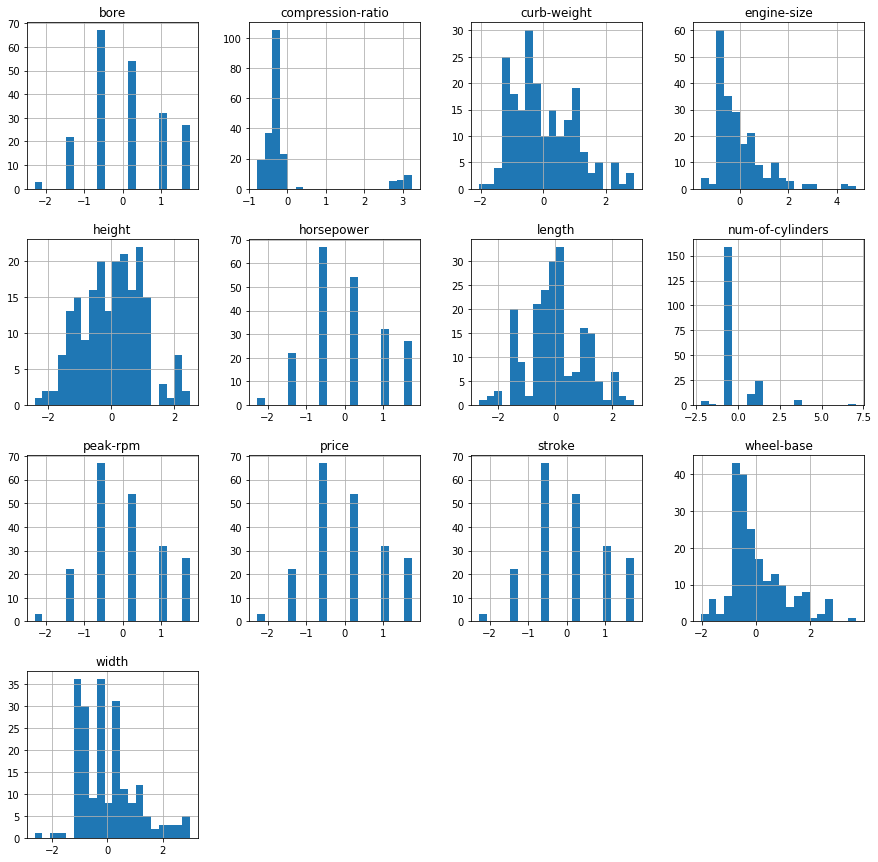

In [48]:
numericalTrain.hist(figsize=(15,15), bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F3D878320>,
      dtype=object)

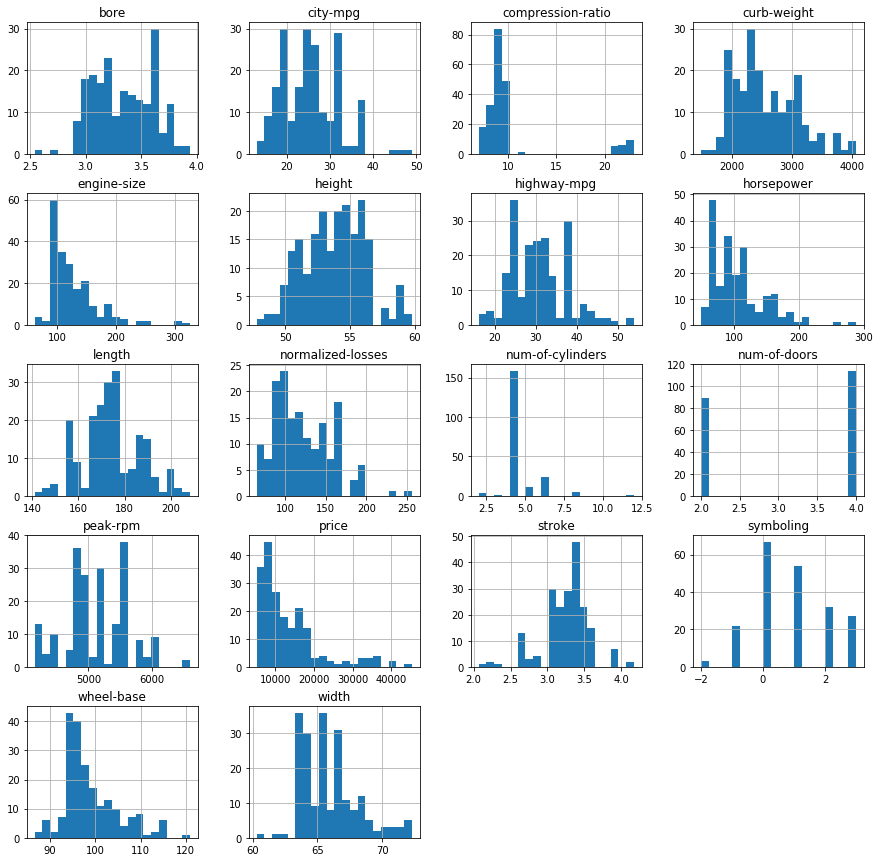

In [49]:
df.hist(figsize=(15,15), bins = 20)

Most of these did not change significantly. The only one concerning is 'bore'. The distribution before though looked slightly normal and the new distribution just looks more normal so I think it is fine. 

One thing that I'm noticing is that num-of cylinders is nearly a constant. Let's eliminate it since it won't add that much to our model

In [50]:
x = x.drop('num-of-cylinders', axis = 1)


Let's eliminate some variables which we know are redundant.

In [51]:
x = x.drop('curb-weight', axis = 1) #This is a function of width and height as we saw above in the correlations.

Let's now do our pca. 

In [52]:
from sklearn.decomposition import PCA

pca = PCA()
numericalTrain = pca.fit_transform(numericalTrain)


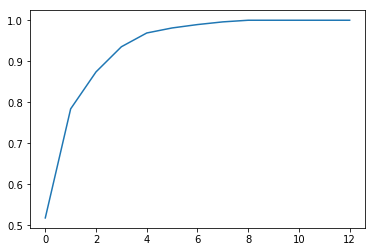

In [53]:
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))

This plot shows us how much variance we would be explaining by including the number of components on the x axis. We see with around 6 components we explain almost all of our variance. This is significantly better than including all of the variables we currently are with our model. 




In [54]:
explained_variance

array([5.17968965e-001, 2.65925206e-001, 9.01503154e-002, 6.13146473e-002,
       3.35722788e-002, 1.22607369e-002, 8.26151236e-003, 6.56126088e-003,
       3.98507797e-003, 1.06973479e-033, 3.61484784e-065, 9.19020557e-098,
       2.56209709e-130])

Now we can create new features by projecting each point back onto the pca. 

In [55]:
pca = PCA(n_components = 8)
pcaResult = pca.fit_transform(numericalTrain)
pcaResult.shape

(205, 8)

In [56]:
pcaResult = pd.DataFrame(pcaResult, columns = ['component1val', 'component2val', 'component3val', 'component4val', 'component5val', 'component6val', 'component7val', 'component8val'])
pcaResult.head()

,component1val,component2val,component3val,component4val,component5val,component6val,component7val,component8val
0,-4.361248,1.608188,0.348628,0.421030,0.626113,-0.845655,-0.423743,0.236563
1,-4.361248,1.608188,0.348628,0.421030,0.626113,-0.845655,-0.423743,0.236563
2,-0.256870,0.906612,1.344530,0.777743,-0.582003,-0.162540,-0.323121,0.117453
3,-1.604611,0.867434,-1.000377,-0.628986,-0.151818,0.371003,0.279947,0.268498
4,-1.152919,1.826816,-0.137023,-0.599880,-0.573082,0.108531,0.024063,-0.003126


Now that we have our numerical columns we also need could look at our categorical for if we decide to use them. 

In [57]:
categorical.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')

One thing that we have to be careful about is the sparsity of the columns. Let's look at the value_counts before we directly one hot encode them.

In [58]:
categorical.make.value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

Only Toyota realistically has a few rows but even that doesn't have that many rows. We don't want to add so much weight to a car being any one of these. Let's therefore drop this variable. 

In [59]:
categorical = categorical.drop('make', axis =1 )

In [60]:
categorical['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

There are few diesel records but a lot of gas. Let's make a variable IsGas

In [61]:
categFin = pd.DataFrame()

categFin['IsGas'] = categorical['fuel-type'] == 'gas' 
categFin['IsGas'] = categFin['IsGas'].map(lambda x: 1 if x else 0) 

In [62]:
categFin.IsGas.value_counts()

1    185
0     20
Name: IsGas, dtype: int64

In [63]:
categorical.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

Likewise lets make a variable IsStd

In [64]:
categFin['IsStd'] = categorical['aspiration'] == 'gas' 
categFin['IsStd'] = categFin['IsStd'].map(lambda x: "1" if x else "0")

In [65]:
categFin.shape

(205, 2)

In [66]:
categorical['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

This variable has enough rows to one hot encode them. I'm not really worried that we would have all 0 for any of these.

In [67]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
res = ohe.fit_transform(categorical['body-style'].values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(res, columns = ['IsSedan', 'IsHatchBack', 'IsWagon', 'IsHardTop', 'IsConvertible'])
dfOneHot.shape

(205, 5)

Let's drop the last variable since that is redundant if we know the first 4. 

In [68]:
dfOneHot = dfOneHot.drop('IsConvertible', axis = 1).reset_index()

In [69]:
categFin.shape

(205, 2)

In [70]:
dfOneHot.shape

(205, 5)

In [71]:
categFin = categFin.reset_index()
categFin = pd.concat([categFin, dfOneHot], axis = 1)

In [72]:
categFin.IsGas.value_counts()

1    185
0     20
Name: IsGas, dtype: int64

In [73]:
categorical['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

Let's do the same with this variable.

In [74]:
ohe = OneHotEncoder()
res = ohe.fit_transform(categorical['drive-wheels'].values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(res, columns = ['Isfwd', 'Isrwd', 'Is4wd'])
dfOneHot.shape

(205, 3)

In [75]:
dfOneHot = dfOneHot.drop('Is4wd', axis = 1)
categFin = pd.concat([categFin, dfOneHot], axis = 1)

In [76]:
categorical['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

I have some data integrity questions about this variable. Is 'l' an engine type? Irrespective of that, I don't want to just make 1 variable for IsOHC even though that is the only 1 with so many rows because that would implicitly be grouping all the other variables as non ohc which I don't want to do since there can be significant differences between these engine types. Instead, since I know I will be dropping the last IsDohcv column I think it is fine to use OHE. 

In [77]:
ohe = OneHotEncoder()
res = ohe.fit_transform(categorical['engine-type'].values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(res, columns = ['IsOhc', 'Isohcf', 'Isohcv', 'Isdohc', 'IsL', 'IsRotor', 'Isdohcv'])
dfOneHot.shape

(205, 7)

In [78]:
dfOneHot = dfOneHot.drop('Isdohcv', axis = 1)
categFin = pd.concat([categFin, dfOneHot], axis = 1)

In [79]:
categorical['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

We are in more of a problem with this one since too many rows have low values. Again, I'm not really sure we could group any of these together. From reading online, these seems like different methods of injecting fuel into a car. This potentially could be useful to us. I am going to OHE encode these and see if we have any issues with this later. If we do we need to think of some way of resampling. O a, t


I'm tempted to say that some of these are just typos. I can't find anything about 'mfi' online for example and it is possible that really this should be 'mpfi'. Since I'm not sure though, I won't change the value.


In [80]:
ohe = OneHotEncoder()
res = ohe.fit_transform(categorical['fuel-system'].values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(res, columns = ['Ismpfi', 'Is2bbl', 'Isidi', 'Is1bbl', 'Isspdi', 'Is4bbl', 'Isspfi', 'Is4bbl'])
dfOneHot.shape


(205, 8)

In [81]:
categFin = pd.concat([categFin, dfOneHot], axis = 1)

In [82]:
categFin = ConvertColsToType(categFin, categFin.columns, int)

In [83]:
x = pd.concat([categFin, pcaResult], axis = 1).drop('index', axis = 1) #index col created by set_index
x.columns

Index(['IsGas', 'IsStd', 'IsSedan', 'IsHatchBack', 'IsWagon', 'IsHardTop',
       'Isfwd', 'Isrwd', 'IsOhc', 'Isohcf', 'Isohcv', 'Isdohc', 'IsL',
       'IsRotor', 'Ismpfi', 'Is2bbl', 'Isidi', 'Is1bbl', 'Isspdi', 'Is4bbl',
       'Isspfi', 'Is4bbl', 'component1val', 'component2val', 'component3val',
       'component4val', 'component5val', 'component6val', 'component7val',
       'component8val'],
      dtype='object')

In [84]:
pcaResult= pcaResult.reset_index() #I did not sort anything so the indexes will match up. 
x = pd.concat([categFin, pcaResult], axis = 1)

In [85]:
x.drop('index', axis = 1, inplace= True)
x.columns

Index(['IsGas', 'IsStd', 'IsSedan', 'IsHatchBack', 'IsWagon', 'IsHardTop',
       'Isfwd', 'Isrwd', 'IsOhc', 'Isohcf', 'Isohcv', 'Isdohc', 'IsL',
       'IsRotor', 'Ismpfi', 'Is2bbl', 'Isidi', 'Is1bbl', 'Isspdi', 'Is4bbl',
       'Isspfi', 'Is4bbl', 'component1val', 'component2val', 'component3val',
       'component4val', 'component5val', 'component6val', 'component7val',
       'component8val'],
      dtype='object')

### Model training

At this point we really could just create the model from our pca components. We could try using the categorical variables first though.  We use all of our variables then reduce for any non significant variables.

We will be using r2 as our metric.

In [86]:
from sklearn.model_selection import train_test_split

y = df['city-mpg']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

In [87]:
import statsmodels.api as sm

def GetModel(x, y):
    x = sm.add_constant(x)
    est = sm.OLS(np.asarray(y), x.astype(float)).fit()
    est.summary()
    return est

In [88]:
#def CrossValidate(x, y, columns, regressorFunc, k):
 #   tx = x.reset_index(drop = True)
  #  ty = y.reset_index(drop = True)
   # est = []
    #setx = []
    #sety = []
    #randInts = np.random.randint(0, k, len(tx))
    #for i in range(k):
     #   setx.append(pd.DataFrame(columns = columns))
      #  sety.append(pd.Series())
    #for i in range(len(tx)):
     #   setx[randInts[i]] = setx[randInts[i]].append(tx.iloc[i])
      #  sety[randInts[i]] = sety[randInts[i]].set_value(i, ty.iloc[i])
    
    #for i in range(len(setx)):
     #   est.append(regressorFunc(setx[i], sety[i]))

      # return est  
    
    
    

In [89]:
est = GetModel(X_train, y_train)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     34.09
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           4.41e-47
Time:                        11:26:17   Log-Likelihood:                -382.97
No. Observations:                 164   AIC:                             817.9
Df Residuals:                     138   BIC:                             898.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.4296      2.956      2.175      0.031       0.585      12.274
IsGas             8.8920      2.152      4.132      0.000       4.637      13.147
IsStd          2.942e-16      2e-15      0.147      0.883   -3.66e-15    4.25e-15
IsSedan           0.2845      2.419      0.118      0.907      -4.498       5.067
IsHatchBack      -0.3647      1.413     -0.258      0.797      -3.158       2.428
IsWagon          -0.4426      1.004     -0.441      0.660      -2.428       1.543
IsHardTop        -0.3176      0.774     -0.410      0.682      -1.849       1.214
Isfwd             0.0287      1.400      0.021      0.984      -2.740       2.797
Isrwd             0.9420      0.769      1.225      0.223      -0.579       2.463
IsOhc            10.2170      3.168      3.225      0.002       3.952      16.482
Isohcf        -2.299e-14    9.5e-15     -2.421      0.017   -4.18e-14   -4.21e-15
Isohcv           10.9775      3.129      3.509      0.001       4.791      17.164
Isdohc            9.5482      3.087      3.093      0.002       3.444      15.652
IsL               8.2088      3.214      2.554      0.012       1.854      14.564
IsRotor          10.5888      3.510      3.017      0.003       3.648      17.530
Ismpfi            2.6457      1.318      2.008      0.047       0.040       5.252
Is2bbl            2.7950      0.981      2.850      0.005       0.856       4.734
Isidi             0.8576      3.263      0.263      0.793      -5.595       7.310
Is1bbl           -2.4623      4.438     -0.555      0.580     -11.237       6.312
Isspdi        -2.506e-15   1.11e-15     -2.251      0.026   -4.71e-15   -3.05e-16
Is4bbl            0.5074      0.935      0.543      0.588      -1.341       2.355
Isspfi            0.3693      1.588      0.233      0.816      -2.770       3.509
Is4bbl            1.7170      2.519      0.681      0.497      -3.265       6.699
component1val    -0.4114      0.278     -1.480      0.141      -0.961       0.138
component2val    -1.9344      0.197     -9.837      0.000      -2.323      -1.546
component3val    -3.7399      1.269     -2.947      0.004      -6.249      -1.230
component4val     5.1609      1.421      3.633      0.000       2.352       7.970
component5val     0.0965      0.450      0.214      0.831      -0.794       0.987
component6val     1.2476      0.717      1.740      0.084      -0.170       2.665
component7val     2.5529      0.776      3.290      0.001       1.019       4.087
component8val    -1.1255      0.929     -1.211      0.228      -2.963       0.712
==============================================================================
Omnibus:                       73.072   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.726
Skew:                           1.620   Prob(JB):         

As a starting point this is not that bad. Our adjusted r^2 is a bit lower than r^2 but we see that we have non significant features.  A closer look shows some problems though. Firstly, almost all the categorical variables are not significant. Secondly, we have a warning on the from stats models that there may be a multi collinearity problem. Let's try to verify this with a vif score.

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
p1 = X_train.copy()
p1c = sm.add_constant(p1)
vifs = [vif(p1c.values, i) for i in range(len(p1c.columns))]
pd.Series(data=vifs, index=p1c.columns).sort_values(ascending=False)

C:\Users\b-coh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\b-coh\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\b-coh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Ismpfi                 inf
Is4bbl                 inf
IsGas                  inf
Is2bbl                 inf
Is1bbl                 inf
Is4bbl                 inf
Isspfi                 inf
Isidi                  inf
Isdohc           44.092328
component3val    41.735243
component4val    36.739036
IsRotor          18.452938
IsL              16.649643
Isohcv           14.658778
IsOhc            12.692566
component1val    11.580518
IsWagon           5.005344
IsHardTop         3.299032
Isrwd             3.157029
component2val     3.148544
IsHatchBack       2.044598
component5val     1.893335
Isfwd             1.768623
component6val     1.761719
component8val     1.598875
IsSedan           1.556147
component7val     1.392539
const             0.000000
IsStd                  NaN
Isohcf                 NaN
Isspdi                 NaN
dtype: float64

We see that we have a lot of high vif scores. This is actually expected though since we know that our categorical variables were related to our numerical variables and our numerical variables were just reduced with PCA.

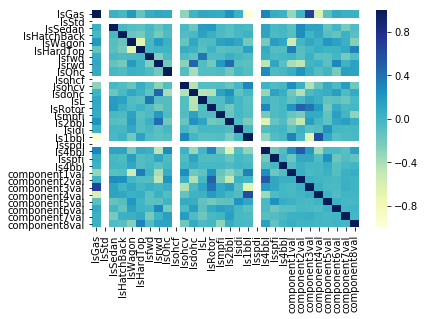

In [91]:
corr = p1.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")

We see medium to very high correlations with almost all of the pca components (the bottom part of the graph. )

Let's therefore make our model with just the pca components.

In [92]:
pcaCols = [f'component{i + 1}val' for i in range(7)]
GetModel(X_train[pcaCols], y_train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     99.54
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           2.99e-54
Time:                        11:26:18   Log-Likelihood:                -405.28
No. Observations:                 164   AIC:                             826.6
Df Residuals:                     156   BIC:                             851.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            25.2755      0.230    109.838      0.000      24.821      25.730
component1val    -0.8348      0.089     -9.416      0.000      -1.010      -0.660
component2val    -2.3192      0.120    -19.365      0.000      -2.556      -2.083
component3val    -1.2567      0.213     -5.907      0.000      -1.677      -0.836
component4val     2.7733      0.253     10.949      0.000       2.273       3.274
component5val    -1.0851      0.353     -3.071      0.003      -1.783      -0.387
component6val     2.6784      0.586      4.572      0.000       1.521       3.835
component7val     3.8231      0.710      5.381      0.000       2.420       5.226
==============================================================================
Omnibus:                       48.746   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.997
Skew:                           1.052   Prob(JB):                     2.03e-42
Kurtosis:                       7.865   Cond. No.                         8.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
p1 = X_train[pcaCols].copy()
p1c = sm.add_constant(p1)
vifs = [vif(p1c.values, i) for i in range(len(p1c.columns))]
pd.Series(data=vifs, index=p1c.columns).sort_values(ascending=False)

component1val    1.014044
component6val    1.012608
component3val    1.009969
const            1.006974
component4val    1.005809
component2val    1.005659
component7val    1.005343
component5val    1.003596
dtype: float64

As we can see, all of our vifs are now. A vif of 1 shows that our variables are independant.

Let's cross validate. Let's use k =5 as that is a standard number. 

In [94]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import linear_model

model = linear_model.LinearRegression()
m1scores = cross_val_score(model, X_train[pcaCols], y_train, cv=5)
np.average(m1scores)

0.7915043308840974

Our cross val score is close to our r^2 score above which is telling us that we aren't overfitting. This makes it safe to proceed to look at our test data. Since we can't really add the categorical variables without increasing the collinearity we will continue.

### Evaluating our test data

In [95]:
X_test = X_test[pcaCols]

In [96]:
model.fit(X_train[pcaCols], y_train)
preds = model.predict(X_test.astype(float))

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.7342651221055861

Our test score is not significantly smaller that our cross val scores considering the small data set we were given to work with. 

Keep in mind this was done without the highway-mpg feature. If we could use it, our results would be much better. This is not a bad score considering the small dataset. 

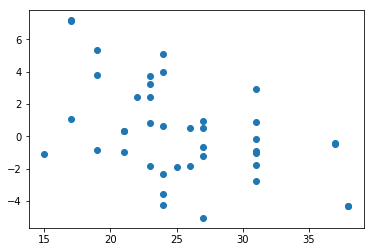

In [98]:
plt.scatter(y_test, preds - y_test)

Our residuals for the most part seem to be scattered around the origin, showing that a linear model was the right choice. 

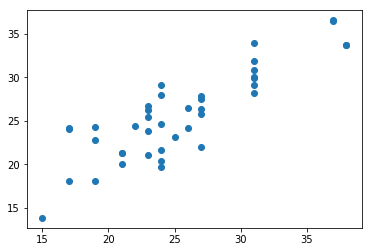

In [99]:
plt.scatter(y_test, preds)


Our expected points and actual points are relatively near each other. 

In [102]:
from sklearn.metrics import mean_squared_error
import math

math.sqrt(mean_squared_error(y_test, preds))

2.9822771863124506

Our rmse is around 3 which isn't terrible. 

### Conclusions.

1. We successfully created a model to predict the city-mpg. 
2. Although using PCA gave us a model that has little multi collinear components, it is harder to explain what each pca component means.
3. This model only uses 7 features so it is computationally more efficient. (although again, this is irrelevant considering that the data is so small.)